# Stochastic process and partial differential equations
## Problem description

Now we start to consider the relationship between stochastic process and partial differential equestions (PDE). We start with considering a 2D Itô process,
$$d\mathbf{\mathit{X_t^i}}=\mu\left(\mathbf{\mathit{X_t^i}},t\right) dt + \sigma\left(\mathbf{\mathit{X_t^i}},t\right)d \mathbf{\mathit{B_t^i}}, \ where \  \mathbf{\mathit{X_t^i}}= \left(
\begin{array}{c}
\mathbf{\mathit{X_t^1}}\\
\mathbf{\mathit{X_t^2}}
\end{array} \right)
, \mathbf{\mathit{B_t^i}}= \left(
\begin{array}{c}
\mathbf{\mathit{B_t^1}}\\
\mathbf{\mathit{B_t^2}}
\end{array} \right)
$$
This stands for a random walker waling in the 2D space. Let's draw a image of walking path. For simplicity, we will set the parameters as follows. $$\mathbf{\mu} = \left(\begin{array}{c} 0 \\ 0 \end{array} \right), \mathbf{\sigma} = \left(\begin{array}{cc} 1 & 0  \\ 0 & 1 \end{array} \right) $$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

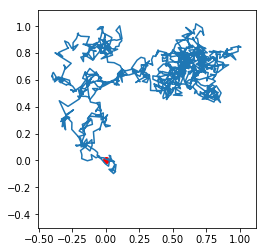

In [6]:
# mu, sigma: average and convariance
# T: total time
# N: time slice
# return order Tx2
def brownian2d(mu, sigma, T=1, N=1000):
    sigma_t = np.sqrt(T/N)
    ds = np.random.normal(0, sigma_t, (N, 2))
    ds = np.dot(ds, sigma) + mu
    return ds

mu = np.array([0, 0])
sigma = np.array([[1, 0], [0, 1]])

#print(brownian2d(mu, sigma, 1, 10))
ret = np.add.accumulate(brownian2d(mu, sigma, N=1000), axis=0)
gca = plt.axes()
gca.set_aspect('equal')
X = ret[:, 0]
Y = ret[:, 1]
xmin, ymin = np.min(ret, axis=0)
xmax, ymax = np.max(ret, axis=0)
plt.xlim(min(xmin, ymin)-0.1, max(xmax, ymax)+0.1)
plt.ylim(min(xmin, ymin)-0.1, max(xmax, ymax)+0.1)
plt.scatter([0], [0], color="r")
plt.plot(X, Y)
plt.show()

This seems quite like a brownian motion. So our exploartion will start from this motion. Consider the [Feynman-Kac formula](https://en.wikipedia.org/wiki/Feynman%E2%80%93Kac_formula) as follows.
$$\partial_t u \left(\mathbf{x}, t\right) + \mu\left(\mathbf{x}, t\right) \partial_x u \left(\mathbf{x}, t\right) + \frac{1}{2} \sigma ^2 \left(\mathbf{x}, t\right)  \partial_{xx} u \left(\mathbf{x}, t\right) - V\left(\mathbf{x}, t\right)u \left(\mathbf{x}, t\right) + f\left(\mathbf{x}, t\right) = 0,\ s.t. \ u \left(\mathbf{x}, T\right) = \psi  \left(\mathbf{x}\right) $$
If we have an Itô process process with the form,
$$d\mathbf{\mathit{X_t^i}}=\mu\left(\mathbf{\mathit{X_t^i}},t\right) dt + \sigma\left(\mathbf{\mathit{X_t^i}},t\right)d \mathbf{\mathit{B_t^i}} $$
Then the fucntion $u \left(\mathbf{x}, t\right)$ should satisfiy the following form,
$$u \left(\mathbf{x}, t\right) = E\left( \int_t^T e^{-\int_t^s V\left(\mathbf{\mathit{X_{s'}}}, s'\right)ds'  }  f\left(\mathbf{\mathit{X_s}}, s\right) ds + e^{-\int_t^T V\left(\mathbf{\mathit{X_{s}}}, s\right)ds } \psi \left(\mathbf{\mathit{X_{T}}}\right) \  \middle\vert \ \mathbf{\mathit{X_t}} = \mathbf{x}\right) $$

Then for a simple diffusion PDE, $ \partial_t u \left(\mathbf{x}, t\right) + \frac{1}{2} \partial_{xx} u \left(\mathbf{x}, t\right) = 0 $, it is just the expectation of walking to some known function values, since $ V\left(\mathbf{\mathit{X_{s}}}, s\right) = 0$. Therefore, 
$u \left(\mathbf{x}, t\right) =  E\left(\psi \left(\mathbf{\mathit{X_{T}}}\right) \  \middle\vert \ \mathbf{\mathit{X_t}} = \mathbf{\mathit{x}}\right) $. This just define the end point as the termination condition. Let us swich side and use $t \mapsto -t$, then the euqation will become $ \partial_t u \left(\mathbf{x}, t\right) - \frac{1}{2} \partial_{xx} u \left(\mathbf{x}, t\right) = 0 $, with $u \left(\mathbf{x}, t\right) =  E\left(\psi \left(\mathbf{\mathit{X_{T}}}\right) \  \middle\vert \ \mathbf{\mathit{X_0}} = \mathbf{\mathit{x}}\right) $. This result is physically obvious, since we can imagine heat has motion like browian. Lets start to simulate this PDE using 2-D random walk.

Consider a circle with $x^2 + y^2 = 1$, with the initial boundary value on the circle equals to 1, while others equals to 0. Therefore we have the boundary conditions 
$$ f\left(x, y\right) =     
    \begin{cases}
      1, & \text{if}\ x^2 + y^2 \ge 1 \\
      0, & \text{otherwise}
    \end{cases} $$
Let's spawn numerous Browians and simulate this PDE.

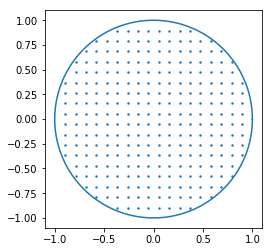

In [8]:
# Draw the PDE boundary
gca = plt.axes()
gca.set_aspect('equal')

def circle(center, radius):
    data = np.linspace(0, 2*np.pi, 1000)
    X = radius*np.cos(data) + center[0]
    Y = radius*np.sin(data) + center[1]
    plt.plot(X, Y)
    
def grid(xmin, xmax, ymin, ymax, nx, ny, cond):
    X, Y = np.meshgrid(
        np.linspace(xmin, xmax, nx),
        np.linspace(ymin, ymax, ny)
    )
    X = X.flatten()
    Y = Y.flatten()
    idx = np.arange(nx*ny)
    #print(X.flatten(), Y.flatten())
    idx = cond(X, Y)
    return X[idx], Y[idx]

X, Y = grid(-1, 1, -1, 1, 20, 20, lambda x, y: x**2 + y**2 <= 1.0**2)
circle([0,0], 1)
plt.scatter(X, Y, s=2.0)
plt.show()

Here we create a 20*20 grid, and start to simulate the PDE with the grid. This will cost some time to run. Finally we can get the PDE function value at every grid in the circle at every time. Then we can plot the contour for this PDE function at any time.

In [10]:
# define a single point browian,
# coord shall be 1x2
def pde_sp(coord, func, T, N):
    traj = np.add.accumulate(brownian2d(mu, sigma, T=T, N=N), axis=0)
    traj = np.roll(traj, 1, axis=0)
    traj[0, :] = 0
    return func(traj)

pde_sp(np.array([0, 0]), lambda t: t[:, 0]**2 + t[:, 1]**2 >= 1.00**2, 1, 1000).shape

(1000,)

In [11]:
nexp = 1000
T = 1
N = 1000
u = []
for coord in np.stack((X, Y), axis=1):
    tmp = []
    for _ in range(nexp):
        tmp.append(pde_sp(coord, lambda t: t[:, 0]**2 + t[:, 1]**2 >= 1.00**2, T, N))
    tmp = np.stack(tmp, axis=1).astype(np.float32)
    u.append(np.average(tmp, axis=1))
u = np.stack(u, axis=0)

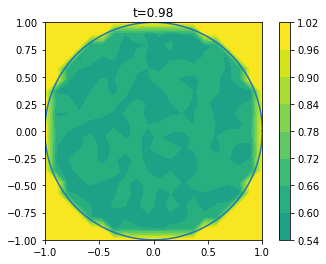

In [91]:
from matplotlib import animation, rc
from IPython.display import HTML


# convert filtered x, y, z back to the original grid, some dirty code
def invgrid(xmin, xmax, ymin, ymax, nx, ny, cond, z):
    X, Y = np.meshgrid(
        np.linspace(xmin, xmax, nx),
        np.linspace(ymin, ymax, ny)
    )
    
    Z = np.ones_like(X)
    idx = cond(X.flatten(), Y.flatten()) 
    Z[idx.reshape(nx, ny)] =  z
    return X, Y, Z

fig, ax = plt.subplots()

# initialization function: plot the background of each frame
# def init():
#    circle([0,0], 1)
# gca = plt.axes()
# gca.set_aspect('equal')
# circle([0,0], 1)

def init():
    return [ax]

# animation function. This is called sequentially
def animate(i):
    global cb
    plt.gcf().clear()
    plt.axes().set_aspect('equal')
    circle([0,0], 1)
    x_, y_, u_ = invgrid(-1, 1, -1, 1, 20, 20, lambda x, y: x**2 + y**2 <= 1.0**2, u[:, i])
    c = plt.contourf(x_, y_, u_,  vmin=0, vmax=1)
    plt.colorbar(c)
    plt.title("t={:.2f}".format(i/1000))
    return c

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=range(0, 1000, 20), interval=200, blit=False)

HTML(ani.to_html5_video())

#plt.colorbar()
#print(ani)
#plt.show()
#fig.show()
#x_, y_, u_ = invgrid(-1, 1, -1, 1, 20, 20, lambda x, y: x**2 + y**2 <= 1.0**2, u[:, 300])

#print(x_.shape, y_.shape, u_.shape)
#gca = plt.axes()
#gca.set_aspect('equal')
#circle([0,0], 1)
#plt.contour(x_, y_, u_,  vmin=0, vmax=1)
#plt.contourf(x_, y_, u_,  vmin=0, vmax=1)
#plt.colorbar()  # draw colorbar


In fact, the answer shall be related to a Bessel's function, which I am a bit lazy to solve. Anyway, it's not our main purpose to analytically solve this PDE.